<a href="https://colab.research.google.com/github/CodeHunterOfficial/TimeSeriesForecast_2024-2025/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0%205.%20%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE%20%D0%B1%D1%83%D1%81%D1%82%D0%B8%D0%BD%D0%B3%D0%B0/%D0%A2%D0%B5%D0%BC%D0%B0_5_1_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B1%D1%83%D1%81%D1%82%D0%B8%D0%BD%D0%B3%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема 5.1. Прогнозирование временных рядов с помощью градиентного бустинга

# 5.2. Ансамбли в машинном обучении

Представим, что у вас есть несколько моделей, обученных на ваших данных. Можно ли придумать процедуру, которая позволит использовать все имеющиеся модели и при этом получить на тестовых данных качество выше, чем могла показать каждая из этих моделей в отдельности?

Да, можно. И в этом параграфе мы расскажем, как именно.

**Смещение и разброс**

Предположим, мы решаем задачу регрессии с квадратичной функцией потерь. При использовании квадратичной функции потерь для оценки качества работы алгоритма $ a $, можно воспользоваться следующим функционалом:
$$ Q(a) = \mathbb{E}_{\mathbf{X}, \epsilon} \left[ (y(x, \epsilon) - a(x, \mathbf{X}))^2 \right], $$
где
- $ \mathbf{X} $ — обучающая выборка,
- $ x $ — точка из тестового множества,
- $ y = f(x) + \epsilon $ — целевая зависимость, где $ \epsilon $ — случайный шум,
- $ a(x, \mathbf{X}) $ — значение алгоритма, обученного на выборке $ \mathbf{X} $, в точке $ x $,
- $ \mathbb{E}_{\mathbf{X}} $ — среднее по всем тестовым точкам, $ \mathbb{E}_{\mathbf{X}, \epsilon} $ — среднее по всем обучающим выборкам $ \mathbf{X} $ и случайному шуму $ \epsilon $.

Для $ Q(a) $ существует разложение на три компоненты — шум, смещение и разброс. Это разложение называется bias-variance decomposition и является мощным инструментом анализа работы ансамблей. О том, как его вывести, вы узнаете в соответствующем параграфе, а здесь мы приведём его формулировку.

Существует представление $ Q(a) $ в виде трёх компонент:
$$ Q(a) = \mathbb{E}_{\mathbf{X}} \left[ \text{bias}_{\mathbf{X}}^2 a(x, \mathbf{X}) \right] + \mathbb{E}_{\mathbf{X}} \left[ \text{Var}_{\mathbf{X}}[a(x, \mathbf{X})] \right] + \sigma^2, $$
где
- $ \text{bias}_{\mathbf{X}} a(x, \mathbf{X}) = f(x) - \mathbb{E}_{\mathbf{X}}[a(x, \mathbf{X})] $ — смещение предсказания алгоритма в точке $ x $, усреднённое по всем возможным обучающим выборкам относительно истинной зависимости $ f $,
- $ \text{Var}_{\mathbf{X}}[a(x, \mathbf{X})] = \mathbb{E}_{\mathbf{X}} \left[ (a(x, \mathbf{X}) - \mathbb{E}_{\mathbf{X}}[a(x, \mathbf{X})])^2 \right] $ — дисперсия (разброс) предсказаний алгоритма в зависимости от обучающей выборки $ \mathbf{X} $,
- $ \sigma^2 = \mathbb{E}_{\mathbf{X}, \epsilon} \left[ (y(x, \epsilon) - f(x))^2 \right] $ — неустранимый шум в данных.

Поскольку ошибка алгоритма раскладывается на шум, смещение и разброс, можно подумать над способами сокращения ошибки. Будет разумно попытаться сначала уменьшить одну из составляющих. Понятно, что с шумом уже ничего не сделать — это минимально возможная ошибка. Одним из способов сократить разброс является использование ансамблей моделей. Примером такого подхода является бэггинг, который аналогичен голосованию независимых экспертов: путём комбинирования результатов нескольких моделей можно снизить разброс, сохраняя при этом низкое смещение.

Давайте  рассмотрим конкретный числовой пример для иллюстрации bias-variance trade-off и как ансамбли моделей могут улучшить общее качество прогнозирования.

Предположим, у нас есть задача регрессии, где истинная зависимость $ f(x) $ от переменной $ x $ задана функцией:
$$ f(x) = 2x + 1. $$

Мы генерируем обучающие выборки $ \mathbf{X}_1, \mathbf{X}_2, \ldots, \mathbf{X}_N $ и для каждой выборки обучаем линейную регрессию. Допустим, что модель линейной регрессии для выборки $ \mathbf{X}_i $ дает предсказание $ a_i(x) $.

Для упрощения примера, предположим, что смещение и разброс оцениваются на одной тестовой точке $ x = 1 $.

1. **Смещение (bias):**
   Смещение предсказания алгоритма в точке $ x $ можно оценить как:
   $$ \text{bias}_{\mathbf{X}_i}(1) = f(1) - \mathbb{E}_{\mathbf{X}_i}[a_i(1)] = 2 \cdot 1 + 1 - \mathbb{E}_{\mathbf{X}_i}[a_i(1)]. $$
   Поскольку оценка $ \mathbb{E}_{\mathbf{X}_i}[a_i(1)] $ может варьироваться, то есть смещение может быть различным для разных выборок $ \mathbf{X}_i $.

2. **Разброс (variance):**
   Разброс предсказаний алгоритма в точке $ x $:
   $$ \text{Var}_{\mathbf{X}_i}[a_i(1)] = \mathbb{E}_{\mathbf{X}_i}[(a_i(1) - \mathbb{E}_{\mathbf{X}_i}[a_i(1)])^2]. $$
   Этот разброс может быть большим, если модель чувствительна к обучающей выборке $ \mathbf{X}_i $.

3. **Ошибка (total error):**
   Полная ошибка в точке $ x = 1 $:
   $$ Q(a_i) = \text{bias}_{\mathbf{X}_i}^2(1) + \text{Var}_{\mathbf{X}_i}[a_i(1)] + \sigma^2, $$
   где $ \sigma^2 $ — неустранимый шум.

Чтобы улучшить общее качество предсказаний, мы можем использовать ансамбль моделей, например, бэггинг (bootstrap aggregating). В бэггинге мы обучаем несколько моделей на различных подмножествах обучающей выборки $ \mathbf{X}_i $, а затем усредняем их предсказания.

Если у нас есть $ N $ моделей, обученных на $ N $ различных выборках $ \mathbf{X}_i $, то:
$$ a_{\text{bagging}}(x) = \frac{1}{N} \sum_{i=1}^{N} a_i(x). $$

Благодаря бэггингу мы снижаем разброс ансамбля $ \text{Var}_{\text{bagging}}[a_{\text{bagging}}(1)] $, сохраняя при этом смещение на том же уровне или даже снижая его незначительно $ \text{bias}_{\text{bagging}}^2(1) $.

Таким образом, использование ансамблей моделей позволяет улучшить общее качество прогнозирования за счет снижения разброса, что иллюстрирует bias-variance trade-off в контексте машинного обучения.


Давайте реализуем пример на Python, который иллюстрирует bias-variance trade-off и как ансамбли моделей могут помочь улучшить качество прогнозирования. В данном случае, мы будем использовать простую линейную регрессию и бэггинг из нескольких таких моделей.

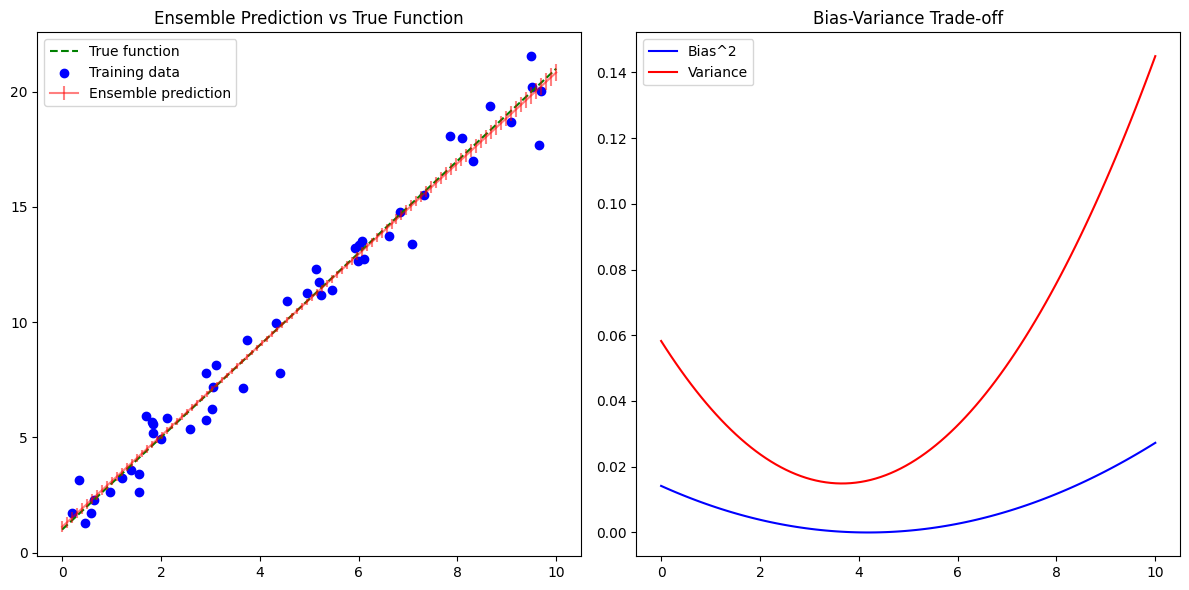

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

# Задаем истинную зависимость f(x) = 2x + 1
def true_function(x):
    return 2 * x + 1

# Генерируем обучающие данные
def generate_data(n_samples, noise_std=1.0):
    X = np.random.rand(n_samples) * 10  # Генерируем n_samples точек на отрезке [0, 10]
    noise = np.random.randn(n_samples) * noise_std  # Генерируем случайный шум
    y = true_function(X) + noise  # Создаем целевую переменную с учетом шума
    return X, y

# Создаем одну модель линейной регрессии и возвращаем ее предсказания на тестовых данных
def train_and_predict(X_train, y_train, X_test):
    model = LinearRegression()
    model.fit(X_train[:, np.newaxis], y_train)
    y_pred = model.predict(X_test[:, np.newaxis])
    return y_pred

# Функция для расчета смещения (bias)
def calculate_bias(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

# Функция для расчета разброса (variance)
def calculate_variance(y_preds):
    return np.mean(np.var(y_preds, axis=0))

# Генерируем данные
np.random.seed(42)
n_samples = 50
X_train, y_train = generate_data(n_samples)
X_test = np.linspace(0, 10, 100)
y_true = true_function(X_test)

# Число моделей в ансамбле
N_models = 100
y_preds = np.zeros((N_models, len(X_test)))

# Обучаем N_models моделей и собираем их предсказания
for i in range(N_models):
    X_resampled, y_resampled = resample(X_train, y_train, random_state=i)
    y_preds[i] = train_and_predict(X_resampled, y_resampled, X_test)

# Вычисляем смещение и разброс для каждой точки тестовых данных
biases = np.zeros(len(X_test))
variances = np.zeros(len(X_test))

for j in range(len(X_test)):
    biases[j] = calculate_bias(np.mean(y_preds[:, j]), y_true[j])
    variances[j] = calculate_variance(y_preds[:, j])

# Печатаем и строим графики
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(X_test, y_true, label='True function', color='green', linestyle='--')
plt.errorbar(X_test, np.mean(y_preds, axis=0), yerr=np.std(y_preds, axis=0), label='Ensemble prediction', color='red', alpha=0.5)
plt.scatter(X_train, y_train, label='Training data', color='blue')
plt.title('Ensemble Prediction vs True Function')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(X_test, biases, label='Bias^2', color='blue')
plt.plot(X_test, variances, label='Variance', color='red')
plt.title('Bias-Variance Trade-off')
plt.legend()

plt.tight_layout()
plt.show()

Давайте реализуем пример на Python, который иллюстрирует bias-variance trade-off и как ансамбли моделей могут помочь улучшить качество прогнозирования. В данном случае, мы будем использовать простую линейную регрессию и бэггинг из нескольких таких моделей.

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

# Задаем истинную зависимость f(x) = 2x + 1
def true_function(x):
    return 2 * x + 1

# Генерируем обучающие данные
def generate_data(n_samples, noise_std=1.0):
    X = np.random.rand(n_samples) * 10  # Генерируем n_samples точек на отрезке [0, 10]
    noise = np.random.randn(n_samples) * noise_std  # Генерируем случайный шум
    y = true_function(X) + noise  # Создаем целевую переменную с учетом шума
    return X, y

# Создаем одну модель линейной регрессии и возвращаем ее предсказания на тестовых данных
def train_and_predict(X_train, y_train, X_test):
    model = LinearRegression()
    model.fit(X_train[:, np.newaxis], y_train)
    y_pred = model.predict(X_test[:, np.newaxis])
    return y_pred

# Функция для расчета смещения (bias)
def calculate_bias(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

# Функция для расчета разброса (variance)
def calculate_variance(y_preds):
    return np.mean(np.var(y_preds, axis=0))

# Генерируем данные
np.random.seed(42)
n_samples = 50
X_train, y_train = generate_data(n_samples)
X_test = np.linspace(0, 10, 100)
y_true = true_function(X_test)

# Число моделей в ансамбле
N_models = 100
y_preds = np.zeros((N_models, len(X_test)))

# Обучаем N_models моделей и собираем их предсказания
for i in range(N_models):
    X_resampled, y_resampled = resample(X_train, y_train, random_state=i)
    y_preds[i] = train_and_predict(X_resampled, y_resampled, X_test)

# Вычисляем смещение и разброс для каждой точки тестовых данных
biases = np.zeros(len(X_test))
variances = np.zeros(len(X_test))

for j in range(len(X_test)):
    biases[j] = calculate_bias(np.mean(y_preds[:, j]), y_true[j])
    variances[j] = calculate_variance(y_preds[:, j])

# Печатаем и строим графики
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(X_test, y_true, label='True function', color='green', linestyle='--')
plt.errorbar(X_test, np.mean(y_preds, axis=0), yerr=np.std(y_preds, axis=0), label='Ensemble prediction', color='red', alpha=0.5)
plt.scatter(X_train, y_train, label='Training data', color='blue')
plt.title('Ensemble Prediction vs True Function')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(X_test, biases, label='Bias^2', color='blue')
plt.plot(X_test, variances, label='Variance', color='red')
plt.title('Bias-Variance Trade-off')
plt.legend()

plt.tight_layout()
plt.show()
```

В этом примере:

1. Мы задали истинную зависимость \( f(x) = 2x + 1 \).
2. Сгенерировали обучающие данные с добавлением случайного шума.
3. Обучили 100 моделей линейной регрессии на случайных подвыборках обучающих данных (эмулируя бэггинг).
4. Рассчитали и сравнили смещение и разброс на тестовых данных.

На графиках вы увидите:

- На левом графике: синие точки представляют обучающие данные, зеленая пунктирная линия показывает истинную зависимость, красная линия с пунктиром — среднее предсказание ансамбля моделей, а красные полосы показывают дисперсию предсказаний ансамбля.
- На правом графике: синяя линия представляет квадрат смещения, а красная линия — разброс.

Этот пример иллюстрирует, как бэггинг (ансамбли моделей) может снижать разброс и улучшать общее качество предсказаний, сохраняя низкое смещение, что является ключевым аспектом bias-variance trade-off.

##Бэггинг

Идея бэггинга (bagging, bootstrap aggregation) заключается в следующем. Пусть обучающая выборка состоит из $ n $ объектов. Мы случайным образом выбираем $ n $ примеров с возвращением из этой выборки, чтобы создать новую выборку $ X_1 $, в которой некоторые элементы исходной выборки могут отсутствовать, а некоторые могут встречаться несколько раз. Затем используем некоторый алгоритм $ b $ для обучения модели $ b_1(x) = b(x, X_1) $. Этот процесс повторяется $ k $ раз, чтобы получить $ k $ моделей, обученных на $ k $ различных выборках.

Чтобы получить одно предсказание, мы усредняем предсказания всех моделей:
$$ a(x) = \frac{1}{k} \sum_{i=1}^{k} b_i(x). $$

Процесс генерации подвыборок с помощью семплирования с возвращением называется бутстрепом (bootstrap), а модели $ b_1(x), \ldots, b_k(x) $ часто называют базовыми моделями. Модель $ a(x) $ называется ансамблем этих моделей.

Рассмотрим, как изменяется качество предсказания при переходе от одной модели к ансамблю. Сначала убедимся, что смещение ансамбля не изменяется по сравнению со средним смещением отдельных моделей. Математическое ожидание смещения $ a(x) $ относительно истинной функции $ f(x) $ можно выразить следующим образом:
$$ \text{bias}_X[a(x)] = f(x) - \mathbb{E}_X[a(x)] = f(x) - \mathbb{E}_X \left[ \frac{1}{k} \sum_{i=1}^{k} b_i(x) \right]. $$
Учитывая, что при взятии математического ожидания по всем обучающим выборкам $ X $ включены все подвыборки, полученные бутстрепом:
$$ \text{bias}_X[a(x)] = f(x) - \mathbb{E}_X[b(x, X)] = \text{bias}_X[b(x, X)]. $$
Таким образом, смещение композиции равно смещению одного алгоритма.

Теперь рассмотрим, что происходит с разбросом. Дисперсия $ a(x) $ может быть выражена как:
$$ \text{Var}_X[a(x)] = \mathbb{E}_X \left[ \left( a(x) - \mathbb{E}_X[a(x)] \right)^2 \right]. $$
При использовании бэггинга:
$$ \text{Var}_X[a(x)] = \frac{1}{k^2} \sum_{i=1}^{k} \text{Var}_X[b_i(x)] + \frac{1}{k^2} \sum_{i \neq j} \text{cov}_X(b_i(x), b_j(x)). $$
Если базовые алгоритмы некоррелированы:
$$ \text{Var}_X[a(x)] = \frac{1}{k} \text{Var}_X[b(x, X)]. $$
Таким образом, дисперсия композиции в $ k $ раз меньше дисперсии отдельного алгоритма, при условии, что базовые алгоритмы некоррелированы.

Эти результаты показывают, как бэггинг может помочь улучшить обобщающую способность модели путем уменьшения дисперсии, сохраняя при этом смещение на уровне одного базового алгоритма.

Давайте приведем конкретный числовой пример для бэггинга.

Предположим, у нас есть обучающая выборка из 100 объектов ($ n = 100 $). Мы хотим построить ансамбль из 5 базовых моделей ($ k = 5 $). Предположим также, что каждая базовая модель обучается на подвыборке размера 80 (так как выборка формируется с возвращением).

1. **Смещение:**

   Предположим, что истинная функция $ f(x) $ для предсказания объекта $ x $ равна 0.5. Пусть среднее смещение одного базового алгоритма $ b(x, X) $ (где $ X $ — выборка из 100 объектов) также равно 0.5.

   Тогда смещение ансамбля $ a(x) $:
   $$ \text{bias}_X[a(x)] = f(x) - \mathbb{E}_X[a(x)] = 0.5 - 0.5 = 0. $$

   Таким образом, смещение ансамбля равно смещению одного базового алгоритма.

2. **Дисперсия:**

   Предположим, что дисперсия каждого базового алгоритма $ b(x, X_i) $ равна 0.1, где $ X_i $ — каждая из 5 подвыборок, полученных бутстрепом.

   Тогда дисперсия ансамбля $ a(x) $:
   $$ \text{Var}_X[a(x)] = \frac{1}{5} \cdot \text{Var}_X[b(x, X_i)] = \frac{1}{5} \cdot 0.1 = 0.02. $$

Этот пример иллюстрирует, как бэггинг может уменьшить дисперсию по сравнению с одиночным базовым алгоритмом при условии, что базовые алгоритмы некоррелированы.


Конкретная реализация бэггинга на Python может выглядеть следующим образом. В качестве примера мы будем использовать решающее дерево (DecisionTreeRegressor) как базовый алгоритм для регрессии, и создадим ансамбль из нескольких таких деревьев.

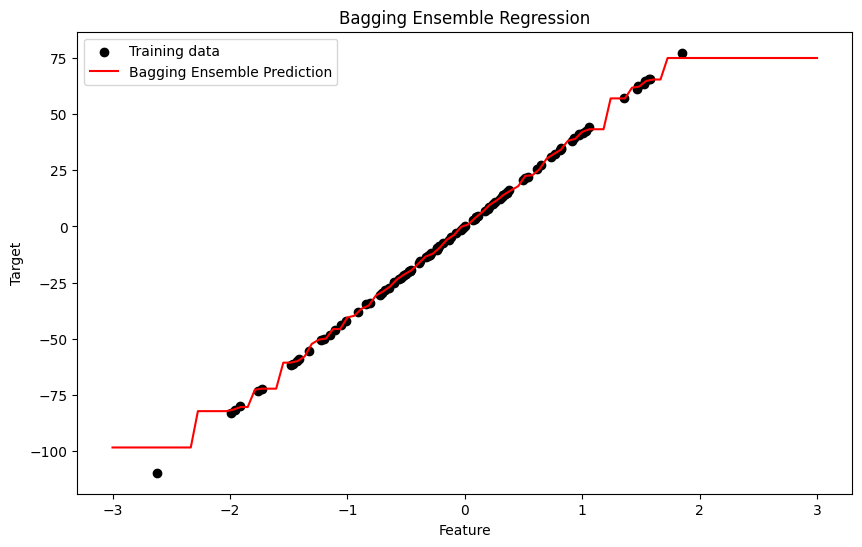

In [14]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

# Генерируем синтетические данные для регрессии
X, y = make_regression(n_samples=100, n_features=1, noise=0.3, random_state=42)

# Параметры бэггинга
n_estimators = 5  # Количество базовых моделей
bootstrap_samples = 80  # Размер подвыборок с возвращением

# Список для хранения базовых моделей
base_models = []

# Обучение базовых моделей
for _ in range(n_estimators):
    # Генерация подвыборки с возвращением
    bootstrap_indices = np.random.choice(X.shape[0], size=bootstrap_samples, replace=True)
    X_bootstrap = X[bootstrap_indices]
    y_bootstrap = y[bootstrap_indices]

    # Создание и обучение базовой модели (решающее дерево)
    base_model = DecisionTreeRegressor(random_state=42)
    base_model.fit(X_bootstrap, y_bootstrap)

    # Добавляем обученную модель в список
    base_models.append(base_model)

# Функция для предсказания ансамбля
def ensemble_predict(models, X):
    predictions = np.zeros(len(X))
    for model in models:
        predictions += model.predict(X)
    return predictions / len(models)

# Пример использования ансамбля для предсказания
X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred_ensemble = ensemble_predict(base_models, X_test)

# Визуализация результатов
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Training data')
plt.plot(X_test, y_pred_ensemble, color='red', label='Bagging Ensemble Prediction')
plt.title('Bagging Ensemble Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

###Пример: бэггинг над решающими деревьями

Пусть наша целевая зависимость $ f(x) $ задаётся как:
$$ f(x) = x \sin(x), $$
и к ней добавляется нормальный шум $ \epsilon \sim \mathcal{N}(0, 9) $. Пример случайного семпла из таких данных:


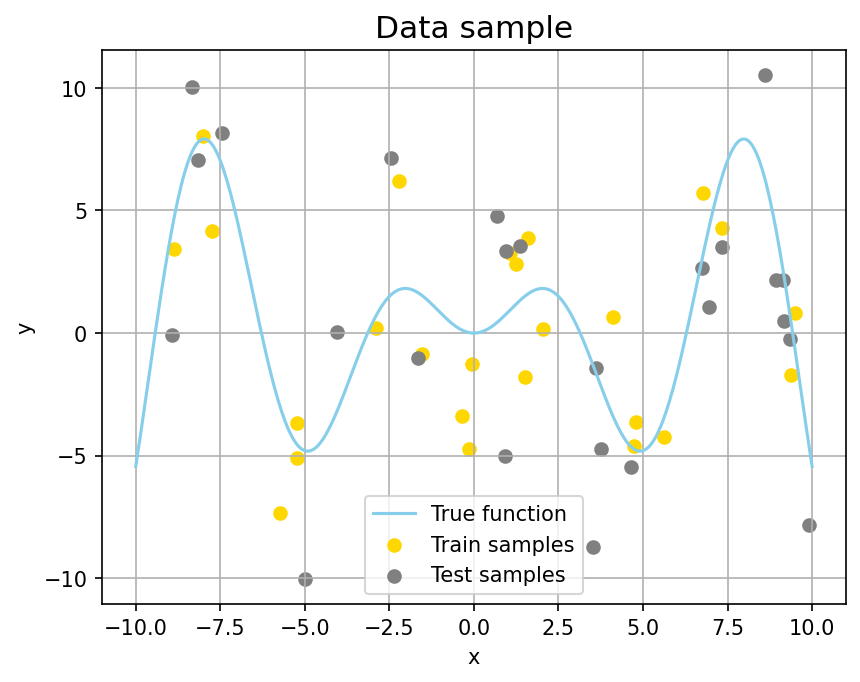

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from typing import Tuple  # Importing Tuple from typing module

def f(x: np.ndarray) -> np.ndarray:
    return x * np.sin(x)

def generate_data(n_samples: int = 50, noise: float = 3, n_noise_samples: int = 1) -> Tuple[np.ndarray, np.ndarray]:
    x = np.random.rand(n_samples) * 20 - 10
    x = np.sort(x)

    y = np.zeros((n_samples, n_noise_samples))
    for i in range(n_noise_samples):
        y[:, i] = f(x) + np.random.normal(0.0, noise, n_samples)

    return x.reshape((n_samples, 1)), y.squeeze()

# Generate data
x, y = generate_data(noise=3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

# Plotting
plt.figure(dpi=150)
plt.title('Data sample', fontsize=15)
plt.plot(np.linspace(-10, 10, 400), f(np.linspace(-10, 10, 400)), color='skyblue', label="True function")
plt.scatter(x_train, y_train, color='gold', label="Train samples")
plt.scatter(x_test, y_test, color='gray', label="Test samples")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Попробуем посмотреть, как выглядят предсказания решающих деревьев глубины 7 и бэггинга над такими деревьями в зависимости от обучающей выборки. Обучим 100 раз решающие деревья на различных случайных выборках размера 20. Также используем бэггинг над 10 решающими деревьями глубины 7 в качестве базовых моделей и обучим его 100 раз на случайных выборках размера 20. Если изобразить предсказания обученных моделей на каждой из 100 итераций, можно увидеть примерно такую картину:

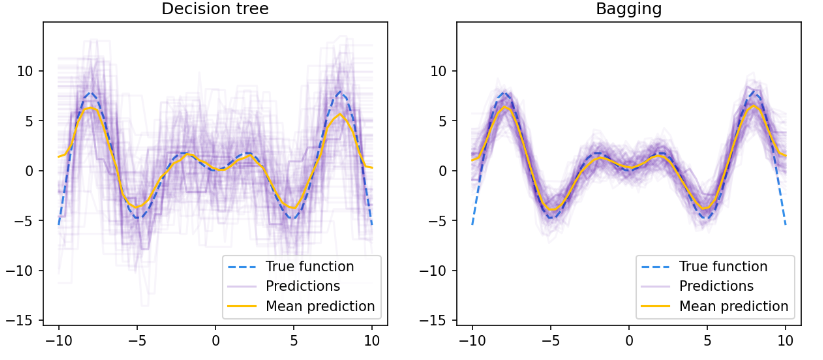


По этому рисунку видно, что общая дисперсия предсказаний в зависимости от обучающего множества у бэггинга значительно ниже, чем у отдельных деревьев, а в среднем предсказания деревьев и бэггинга не отличаются.

Чтобы подтвердить это наблюдение, мы можем изобразить смещение и разброс случайных деревьев и бэггинга в зависимости от максимальной глубины:


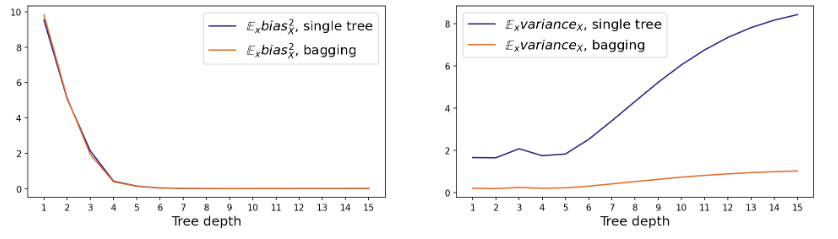


На графике видно, что бэггинг значительно сократил дисперсию. Действительно, дисперсия уменьшилась практически в 10 раз, что соответствует числу базовых моделей $ k $, используемых бэггингом для предсказания.


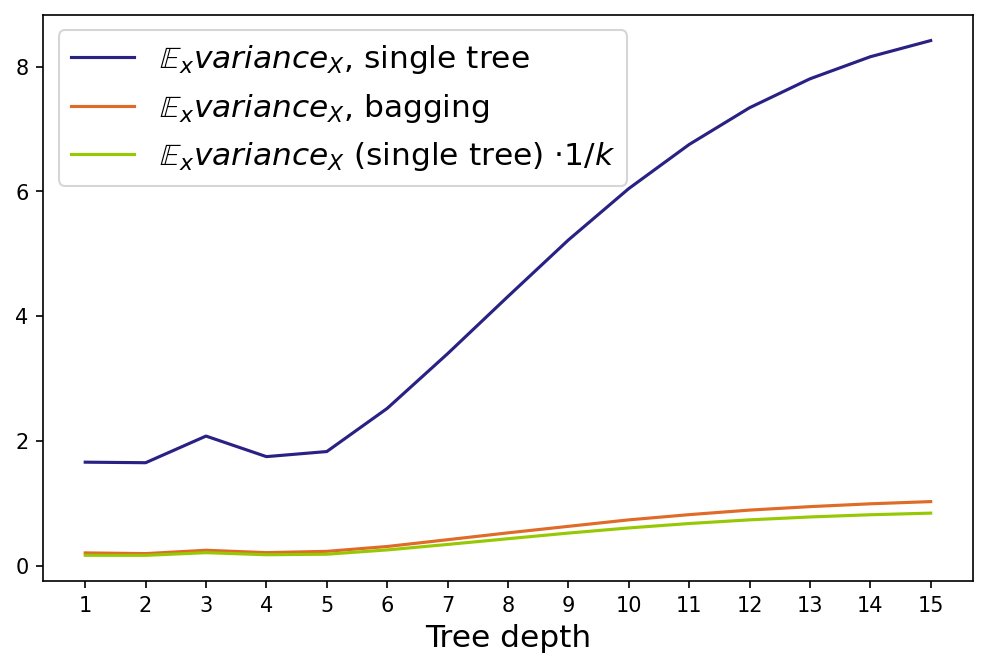

## Random Forest

В предыдущем разделе мы предположили, что базовые алгоритмы в ансамбле не коррелируют между собой, что приводит к значительному уменьшению дисперсии ансамбля по сравнению с отдельными базовыми алгоритмами. Однако на практике сложно добиться полного отсутствия корреляции, так как базовые алгоритмы обучаются на пересекающихся подмножествах данных, что может привести к их схожести. В случае Random Forest это требование ослабляется: достаточно, чтобы базовые деревья были в некоторой степени различны.

Ансамбль Random Forest строится следующим образом:
1. Для построения каждого дерева:
   - Как и в обычном бэггинге, из обучающей выборки $ X $ выбирается с возвращением случайная подвыборка $ X_i $ того же размера, что и $ X $.
   - В процессе обучения каждого дерева в каждой вершине случайно выбираются $ n < N $ признаков из общего числа $ N $ признаков (метод случайных подпространств). Далее выбирается оптимальный сплит среди этих признаков. Этот подход помогает контролировать корреляцию между базовыми алгоритмами.
   
2. Для получения предсказания ансамбля на тестовом объекте:
   - В случае регрессии усредняются отдельные ответы деревьев.
   - В случае классификации выбирается наиболее часто встречающийся класс.

3. В результате мы получаем Random Forest — комбинацию бэггинга и метода случайных подпространств для решающих деревьев.

При построении Random Forest у специалиста по машинному обучению есть несколько возможностей для настройки:
- Выбор числа деревьев в ансамбле.
- Установка параметров для каждого дерева, таких как глубина дерева или минимальное число объектов в листе.
- Настройка числа признаков $ n $, которые выбираются случайным образом при построении каждого сплита.

Эти параметры позволяют настраивать и оптимизировать Random Forest под конкретную задачу и данные, улучшая его эффективность и обобщающую способность.




Давайте представим конкретный числовой пример построения Random Forest для расчета предсказаний ансамбля.

Предположим, у нас есть обучающая выборка с 1000 объектами и 10 признаками. Мы хотим построить Random Forest из 3 деревьев.

1. **Выборка данных для каждого дерева:**
   - Для каждого дерева выбирается случайная подвыборка с возвращением размером 700 объектов из общих 1000 объектов.

2. **Выбор признаков для каждого сплита:**
   - Пусть у нас есть 10 признаков. При построении каждого сплита в узле дерева будет случайным образом выбираться 3 признака из этих 10.

3. **Построение деревьев и ансамбля:**
   - Для каждого из 3 деревьев будут случайным образом выбираться подвыборки данных и подмножества признаков.

Допустим, после обучения мы получили следующие деревья (это упрощенный пример, реальные деревья могут быть более глубокими и сложными):

Дерево 1:
- Выборка данных: $ X_1 $ (содержит 700 объектов)
- Выбранные признаки для сплитов: $ \{f_2, f_5, f_8\} $

Дерево 2:
- Выборка данных: $ X_2 $ (содержит 700 объектов)
- Выбранные признаки для сплитов: $ \{f_1, f_3, f_6\} $

Дерево 3:
- Выборка данных: $ X_3 $ (содержит 700 объектов)
- Выбранные признаки для сплитов: $ \{f_4, f_7, f_{10}\} $

4. **Предсказание ансамбля:**
   - Для регрессии: усредняем предсказания всех деревьев.
     Предположим, что для объекта $ \mathbf{x} $ получили следующие предсказания от каждого дерева:
     - Дерево 1: $ \hat{y}_1 = 20 $
     - Дерево 2: $ \hat{y}_2 = 25 $
     - Дерево 3: $ \hat{y}_3 = 22 $
     
Тогда предсказание ансамбля $ \hat{y}_{\text{ensemble}} $ будет:
$$
\hat{y}_{\text{ensemble}} = \frac{\hat{y}_1 + \hat{y}_2 + \hat{y}_3}{3} = \frac{20 + 25 + 22}{3} = 22.33
 $$
Итак, предсказание ансамбля для объекта $ \mathbf{x} $ составляет примерно 22.33.

- Для классификации: выбираем класс, который предсказывается наиболее часто.
     - Дерево 1: Класс A
     - Дерево 2: Класс B
     - Дерево 3: Класс A
     
     Тогда предсказание ансамбля будет класс A, так как он предсказан двумя деревьями из трех.

Это пример простого случая Random Forest. В реальных задачах параметры и процедура построения могут варьироваться, но основная идея использования случайных подвыборок данных и случайных подмножеств признаков остается ключевой для снижения корреляции между базовыми деревьями в ансамбле.


Среднеквадратичная ошибка Random Forest: 1.1693


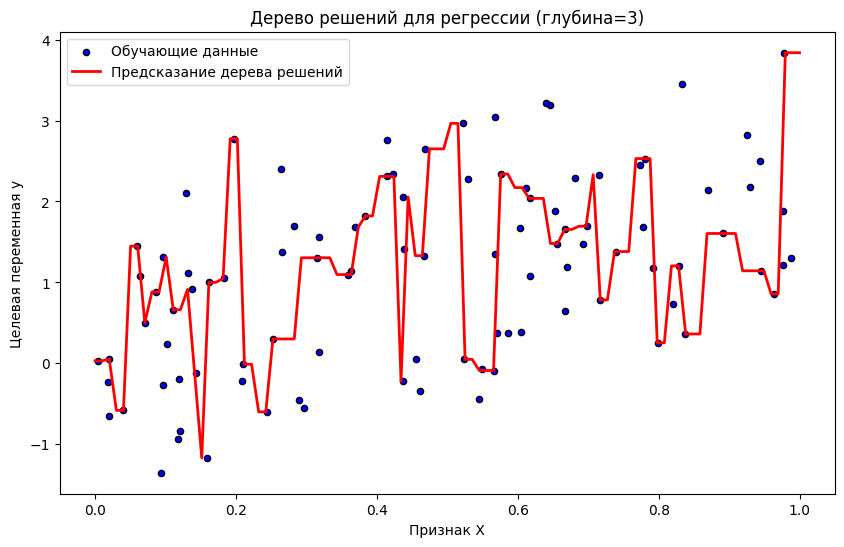

In [21]:
# Импортируем необходимые библиотеки и модули
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Генерируем синтетические данные
np.random.seed(0)
X = np.random.rand(100, 1)       # Признак (одномерный случайный массив)
y = 2.0 * X.squeeze() + np.random.randn(100)  # Целевая переменная с шумом

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем экземпляр класса RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Обучаем модель на обучающих данных
rf_reg.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = rf_reg.predict(X_test)

# Вычисляем среднеквадратичную ошибку (MSE) на тестовой выборке
mse = mean_squared_error(y_test, y_pred)
print(f'Среднеквадратичная ошибка Random Forest: {mse:.4f}')

# Выбираем одно дерево из ансамбля (например, первое дерево)
tree_reg = rf_reg.estimators_[0]

# Диапазон для предсказания (для построения графика)
X_range = np.linspace(0, 1, 100).reshape(-1, 1)

# Делаем предсказания выбранного дерева на всем диапазоне
y_pred_tree = tree_reg.predict(X_range)

# Визуализация дерева решений
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='b', s=20, edgecolor='k', label='Обучающие данные')
plt.plot(X_range, y_pred_tree, color='r', label='Предсказание дерева решений', linewidth=2)
plt.xlabel('Признак X')
plt.ylabel('Целевая переменная y')
plt.title('Дерево решений для регрессии (глубина=3)')
plt.legend()
plt.show()

#### Какая должна быть глубина деревьев в случайном лесу?
Ошибка модели (на которую мы можем повлиять) состоит из смещения и разброса. Разброс мы уменьшаем с помощью процедуры бэггинга. На смещение бэггинг не влияет, а хочется, чтобы у леса оно было небольшим. Поэтому смещение должно быть небольшим у самих деревьев, из которых строится ансамбль.
У неглубоких деревьев малое число параметров, то есть дерево способно запомнить только верхнеуровневые статистики обучающей подвыборки. Они во всех подвыборках будут похожи, но будут не очень подробно описывать целевую зависимость. Поэтому при изменении обучающей подвыборки предсказание на тестовом объекте будет стабильным, но не точным (низкая дисперсия, высокое смещение).
Наоборот, у глубоких деревьев нет проблем запомнить подвыборку подробно. Поэтому предсказание на тестовом объекте будет сильнее меняться в зависимости от обучающей подвыборки, зато в среднем будет близко к истине (высокая дисперсия, низкое смещение).
Вывод: используем глубокие деревья.
#### Сколько признаков надо подавать дереву для обучения?
Ограничивая число признаков, которые используются в обучении одного дерева, мы также управляем качеством случайного леса. Чем больше признаков, тем больше корреляция между деревьями и тем меньше чувствуется эффект от ансамблирования. Чем меньше признаков, тем слабее сами деревья.
Практическая рекомендация — брать корень из числа всех признаков для классификации и треть признаков для регрессии.
#### Сколько должно быть деревьев в случайном лесе?
Выше было показано, что увеличение числа элементарных алгоритмов в ансамбле не меняет смещения и уменьшает разброс. Так как число признаков и варианты подвыборок, на которых строятся деревья в случайном лесе, ограничены, уменьшать разброс до бесконечности не получится. Поэтому имеет смысл построить график ошибки от числа деревьев и ограничить размер леса в тот момент, когда ошибка перестанет значимо уменьшаться.
Вторым практическим ограничением на количество деревьев может быть время работы ансамбля. Однако есть положительное свойство случайного леса: случайный лес можно строить и применять параллельно, что сокращает время работы, если у нас есть несколько процессоров. Но процессоров, скорее всего, всё же сильно меньше числа деревьев, а сами деревья обычно глубокие. Поэтому на большом числе деревьев Random Forest может работать дольше желаемого и количество деревьев можно сократить, немного пожертвовав качеством.



## Бустинг (boosting)

Бустинг (boosting) — это ансамблевый метод, в котором, как и в предыдущих методах, используется множество базовых алгоритмов из одного семейства, которые объединяются в более сильную модель. В отличие от бэггинга и случайного леса, базовые алгоритмы в бустинге обучаются последовательно, а не параллельно.


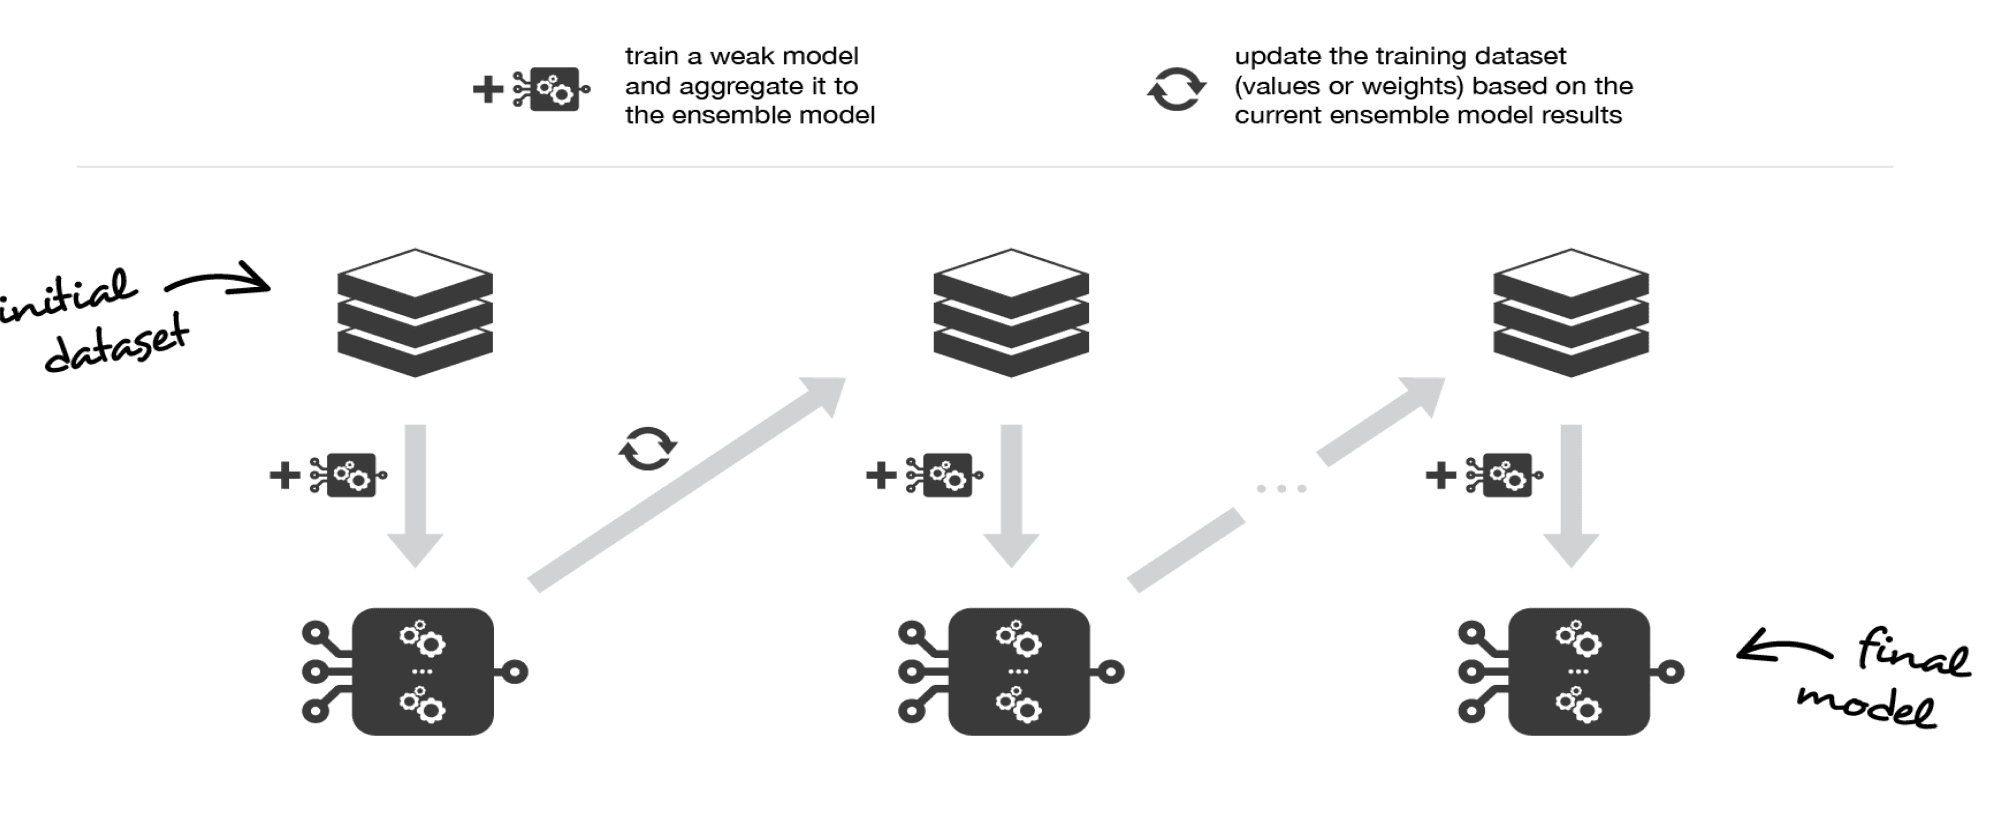


Каждый следующий базовый алгоритм в бустинге обучается таким образом, чтобы уменьшить общую ошибку всех предыдущих. Это приводит к тому, что итоговая композиция имеет меньшее смещение по сравнению с отдельными базовыми алгоритмами (хотя также может происходить уменьшение разброса).

Поскольку основная цель бустинга — уменьшение смещения, часто в качестве базовых алгоритмов выбираются модели с высоким смещением и небольшим разбросом. Например, если базовыми классификаторами выступают деревья, их глубина обычно ограничена 2-3 уровнями.

Ещё одной важной причиной выбора моделей с высоким смещением в качестве базовых является их относительная простота и быстрота обучения. Это существенно для последовательного обучения, которое может быть затратным по времени, если каждый раз учить сложные модели. На данный момент основным методом бустинга с практической точки зрения является градиентный бустинг, о котором подробно рассказывается в соответствующем разделе.

Хотя случайный лес представляет собой мощный и относительно простой для понимания алгоритм, на практике он чаще уступает градиентному бустингу. Поэтому градиентный бустинг сейчас является основным решением для продакшн-задач, связанных с табличными данными (в то время как для работы с неоднородными данными, такими как изображения и тексты, доминируют нейронные сети).

Конкретный пример применения бустинга можно рассмотреть на задаче классификации клиентов банка для прогнозирования невыполнения кредитных обязательств. Предположим, что для этой задачи мы выбрали в качестве базовых алгоритмов решающие деревья с небольшой глубиной.

1. **Подготовка данных**: Имеются данные о клиентах банка, включающие информацию о доходе, возрасте, кредитной истории и т.д.

2. **Построение базовых моделей**: На первом шаге бустинга обучается первое решающее дерево, которое пытается разделить клиентов на тех, кто имеет высокий риск невыполнения кредитных обязательств, и тех, кто имеет низкий риск.

3. **Коррекция ошибок**: Следующие деревья обучаются таким образом, чтобы исправлять ошибки первой модели. Они фокусируются на клиентах, которые были неправильно классифицированы первым деревом, уточняя предсказания.

4. **Формирование итоговой модели**: Итоговая модель представляет собой сумму (или взвешенную сумму) всех базовых деревьев. Она комбинирует предсказания всех деревьев, учитывая ошибки каждой предыдущей модели.

Преимущества бустинга в данном случае включают улучшение точности прогнозирования за счет последовательного улучшения модели, способность работать с разнообразными данными и легкость в настройке параметров для достижения оптимальной производительности.

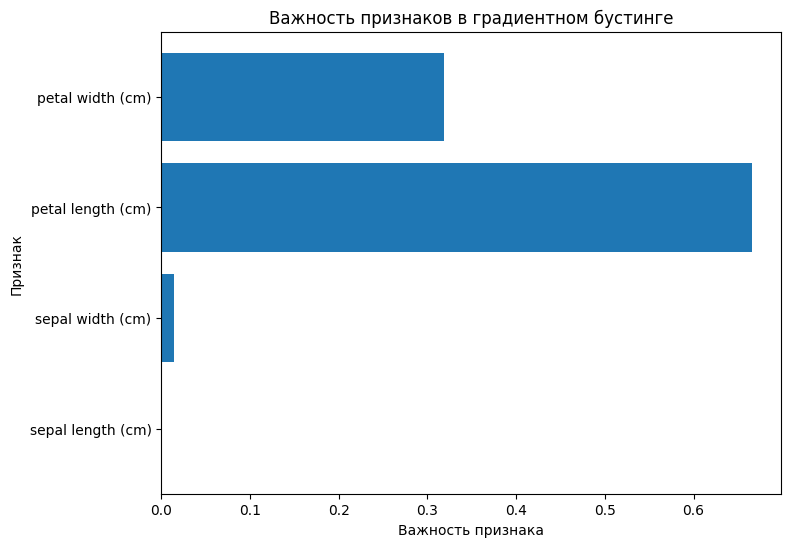

Accuracy: 1.0000


In [24]:
# Импорт необходимых библиотек и классов
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели градиентного бустинга
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
clf.fit(X_train, y_train)

# Важность признаков
feature_importance = clf.feature_importances_
feature_names = iris.feature_names

# Визуализация важности признаков
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков в градиентном бустинге')
plt.show()

# Прогнозирование на тестовом наборе
y_pred = clf.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


##Стекинг (stacking)
Стекинг (stacking)— это метод ансамблирования, который отличается от предыдущих подходов следующим образом:

1. Он может использовать алгоритмы разных типов, а не только из фиксированного семейства. Например, в качестве базовых алгоритмов могут выступать метод ближайших соседей и линейная регрессия.
   
2. Результаты работы базовых алгоритмов объединяются в один ансамбль с помощью обучаемой мета-модели, а не через какой-то стандартный метод агрегации, такой как суммирование или усреднение.
   
Процесс обучения стекинга включает несколько этапов:

1. Исходная выборка разделяется на тренировочную и тестовую.
   
2. Тренировочная выборка разделяется на несколько фолдов. Затем эти фолды используются для обучения базовых алгоритмов и для генерации предсказаний (мета-факторов). Этот процесс аналогичен кросс-валидации и используется для предотвращения переобучения базовых алгоритмов.


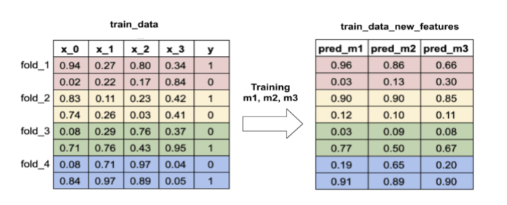


3. На полученных мета-факторах обучается мета-модель. Помимо мета-факторов, она может использовать исходные признаки из датасета в зависимости от поставленной задачи.


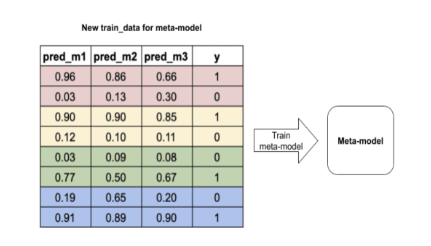


Для получения мета-факторов на тестовом наборе данных базовые алгоритмы могут быть обучены на всей тренировочной выборке, при этом избегая переобучения.

Если данных достаточно много, можно использовать простое разделение обучающих данных на две части: одну для обучения базовых алгоритмов и другую для их предсказаний и обучения мета-модели. Этот подход иногда называют блендингом (blending). При большом количестве данных тестовый набор также можно разделить на тестовую и валидационную части, используя последнюю для подбора гиперпараметров моделей-участников.

С точки зрения смещения и разброса стекинг не имеет прямой интерпретации, так как он не напрямую минимизирует ни смещение, ни разброс ошибки. Успешный стекинг просто уменьшает общую ошибку прогнозирования, что ведет к уменьшению её компонент.



Рассмотрим конкретный пример применения стекинга в задаче прогнозирования цен на недвижимость.

1. **Базовые алгоритмы**:
   - **Метод ближайших соседей (k-Nearest Neighbors, kNN)**: Этот алгоритм может использоваться для предсказания цены на основе характеристик схожих объектов.
   - **Линейная регрессия**: Представляет собой простую модель, которая может учесть линейные зависимости между признаками и целевой переменной.

2. **Мета-модель**:
   - **Решающее дерево (Decision Tree)**: В данном случае мета-модель может быть решающим деревом, которое будет комбинировать предсказания базовых моделей (kNN и линейной регрессии) для предсказания цены недвижимости на основе их результатов.

Процесс стекинга можно разбить на следующие шаги:

- **Шаг 1: Разделение данных**:
  Исходный набор данных разбивается на обучающую и тестовую выборки.

- **Шаг 2: Обучение базовых моделей**:
  Обучаются базовые модели (kNN и линейная регрессия) на обучающей выборке. Каждая модель делает предсказания для тестовой выборки.

- **Шаг 3: Формирование мета-признаков**:
  Предсказания базовых моделей для тестовой выборки становятся мета-признаками. То есть, это новые признаки, которые заменяют или дополняют исходные признаки.

- **Шаг 4: Обучение мета-модели**:
  Мета-модель (решающее дерево) обучается на обучающей выборке, используя в качестве признаков исходные признаки и мета-признаки, полученные на предыдущем шаге.

- **Шаг 5: Оценка качества модели**:
  Качество стекинга оценивается на тестовой выборке, где базовые модели делали предсказания, а мета-модель объединяла их результаты для финального прогноза цен на недвижимость.

Этот пример иллюстрирует основные принципы стекинга, включая использование различных типов базовых моделей и мета-модели для повышения точности прогнозирования.

Mean Squared Error на тестовой выборке: 0.5558915986952422


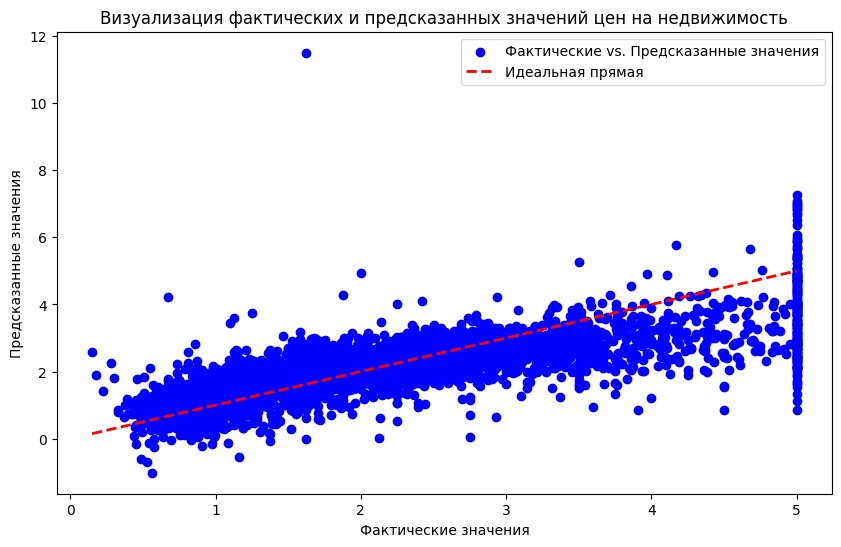

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Загрузка датасета California housing
california_housing = fetch_california_housing()

# Извлечение признаков и целевой переменной
X = california_housing.data  # Признаки
y = california_housing.target  # Целевая переменная (цены на жилье)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели линейной регрессии
model = LinearRegression()

# Обучение модели на обучающих данных
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error на тестовой выборке: {mse}')

# Визуализация фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Фактические vs. Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Идеальная прямая')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Визуализация фактических и предсказанных значений цен на недвижимость')
plt.legend()
plt.show()


## Литература

1. https://education.yandex.ru/handbook/ml/article/ansambli-v-mashinnom-obuchenii
2. https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205
3. https://medium.com/@stevenyu530_73989/stacking-and-blending-intuitive-explanation-of-advanced-ensemble-methods-46b295da413c